<a href="https://colab.research.google.com/github/GDharan10/Sleep_Efficiency-dataset/blob/main/Sleep_Efficiency_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librarys**

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

In [29]:
df = pd.read_csv("/content/Sleep_Efficiency.csv")

In [30]:
df.head(5)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


# **DataFrame observation**


In [ ]:
continuous_columns = ["Age", "Bedtime", "Wakeup time", "Sleep duration", "Sleep efficiency",	"REM sleep percentage",	"Deep sleep percentage",
                      "Light sleep percentage",	"Awakenings", "Caffeine consumption", "Alcohol consumption", "Exercise frequency"]
category_columns = ["Gender", "Smoking status"]

#Unsupervised

# **Data cleaning using pandas**


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [24]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [33]:
df.drop("ID", axis = 1, inplace = True)

In [ ]:
df["Bedtime"] = pd.to_datetime(df["Bedtime"], format = '%Y-%m-%d %H:%M:%S')
df["Wakeup time"] = pd.to_datetime(df["Wakeup time"], format = '%Y-%m-%d %H:%M:%S')


# **Hypothesis testing / Statistical analysis**


Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [ ]:
def hypothesisTesting(continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  #Central Limit Theorem
  oneContinesColumn_result = {}
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }

  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
        oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )

  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "H0 is accepted"
          hypothesis_df[column_2][column_1] = "H0 is accepted"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "H0 is rejected"
            hypothesis_df[column_2][column_1] = "H0 is rejected"

  #Chi-Square Test
  if category_columns:
    for i in range(len(category_columns) - 1):
        column_1 = category_columns[i]
        for column_2 in category_columns[i + 1:]:
            data = pd.crosstab(df[column_1], df[column_2])
            observed_values = data.values
            chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

            if p_value > 0.05:
                # H0 is accepted, There is no relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "H0 is accepted"
                hypothesis_df[column_2][column_1] = "H0 is accepted"
            else:
                # H0 is rejected, There is a relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "H0 is rejected"
                hypothesis_df[column_2][column_1] = "H0 is rejected"

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "H0 is accepted"
            hypothesis_df[continuous_column][category_column] = "H0 is accepted"
        else:
            # H0 is rejected, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "H0 is rejected"
            hypothesis_df[continuous_column][category_column] = "H0 is rejected"

  return oneContinesColumn_result, hypothesis_df

# Correlation

In [ ]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


# **Result Hypothesis**

In [ ]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(continuous_columns , category_columns)

In [ ]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,total_bill,tip
Population Mean,19.785943,2.998279
Sample Means,{19.958718749999996},{3.020567708333333}
H0_accepted,25,20
H0_rejected,23,28
Conclusion,"H0 is accepted, Ha is rejected, There is no si...","H0 is rejected, Ha is accepted, There is a sig..."


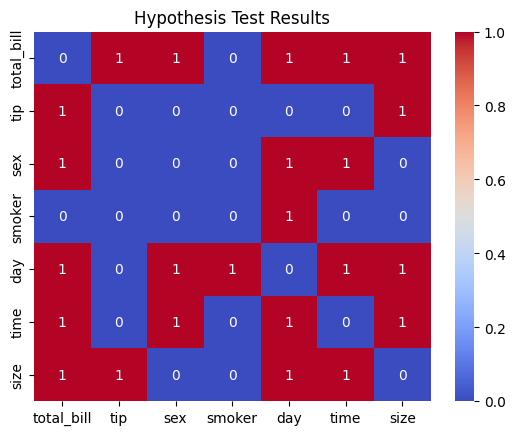

In [ ]:
# Create a heatmap
sns.heatmap(comperativeColumn_result == 'H0 is rejected', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

In [ ]:
sns.set()
comperativeColumn_result.fillna(3, inplace = True)
comperativeColumn_result.replace({'H0 is accepted': 1, 'H0 is rejected': 0}, inplace=True)
fig = px.imshow(comperativeColumn_result, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

# **Data Visualization**

In [ ]:
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

<ipython-input-33-ebcbbf98ef30>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


# **Preprocessing**

In [ ]:
df.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [ ]:
# Replacing categorical values with numerical equivalents
df['sex'] = df['sex'].map({'Female': 101, 'Male': 102})
df['smoker'] = df['smoker'].map({'No': 201, 'Yes': 202})
df['day'] = df['day'].replace({'Sun': 301, 'Thur': 302, 'Fri': 303, 'Sat' : 304})
df['time'] = df['time'].replace({'Dinner': 401, 'Lunch': 402})
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,101,201,301,401,2
1,10.34,1.66,102,201,301,401,3
2,21.01,3.50,102,201,301,401,3
3,23.68,3.31,102,201,301,401,2
4,24.59,3.61,101,201,301,401,4
...,...,...,...,...,...,...,...
239,29.03,5.92,102,201,304,401,3
240,27.18,2.00,101,202,304,401,2
241,22.67,2.00,102,202,304,401,2
242,17.82,1.75,102,201,304,401,2


# **Machine Learning**

In [ ]:
# 1 data availability
# 2 separating independent and dependent
# 3 identifying algorithms/Model
# 4 training
# 5 evaluation

# Supervised Regression - Linear regression

Step 1: Data Availability:
Ensure you have your independent variable(s) x1 and dependent variable y

Step 2: Separating Independent and Dependent Variables:

x1 = Independent_variable_data

y = Dependent_variable_data

Step 3: Creating and Fitting the Model
Add a constant term to the independent variable:

x = sm.add_constant(x1)

Step 4: Create an Ordinary Least Squares (OLS) model:

model = sm.OLS(y, x)

Step 5: Traing the model:

result = model.fit()

Step 6: Evaluation:
Print the summary of the regression results

print(result.summary())

Step 7: Predictions:
Predict y values based on the fitted model

yhat = result.predict(x)


In [ ]:
'''
x1 = df.independent_column
y = df.dependent_column
x = sm.add_constant(x1)
model = sm.OLS(y,x)
result = model.fit()
result.summary()
yhat = result.params[0]+result.params[1]* x1
'''

# Supervised Classification - Logistic regression

x1 = Independent

y = Dependent

x=sm.add_constant(x1)

result_log = sm.Logit(y,x).fit()

result_log.pred_table()

confusion_matrix_df=pd.DataFrame(result_log.pred_table())

confusion_matrix=np.array(confusion_matrix_df)

acc=(confusion_matrix[0,0]+confusion_matrix[1,1])/confusion_matrix.sum()

result_log.summary()